In [225]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
data=pd.read_csv("country_vaccinations.csv")
data_manu=pd.read_csv("country_vaccinations_by_manufacturer.csv")

In [226]:
print(data.shape)
print(data_manu.shape)

(86512, 15)
(35623, 4)


In [227]:
data.head(2)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [228]:
data_manu.head(4)

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481


preprocessing the datasets


handle the missing values

In [229]:
print(data.isnull().sum())
print("----------------------------------------")
print(data_manu.isnull().sum())

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64
----------------------------------------
location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64


In [230]:
data.dropna(axis=0,inplace=True)


In [231]:
data.shape

(30847, 15)

Outlierhandling

Finding outlier and its distribution

Covid vaccination

<function matplotlib.pyplot.show(close=None, block=None)>

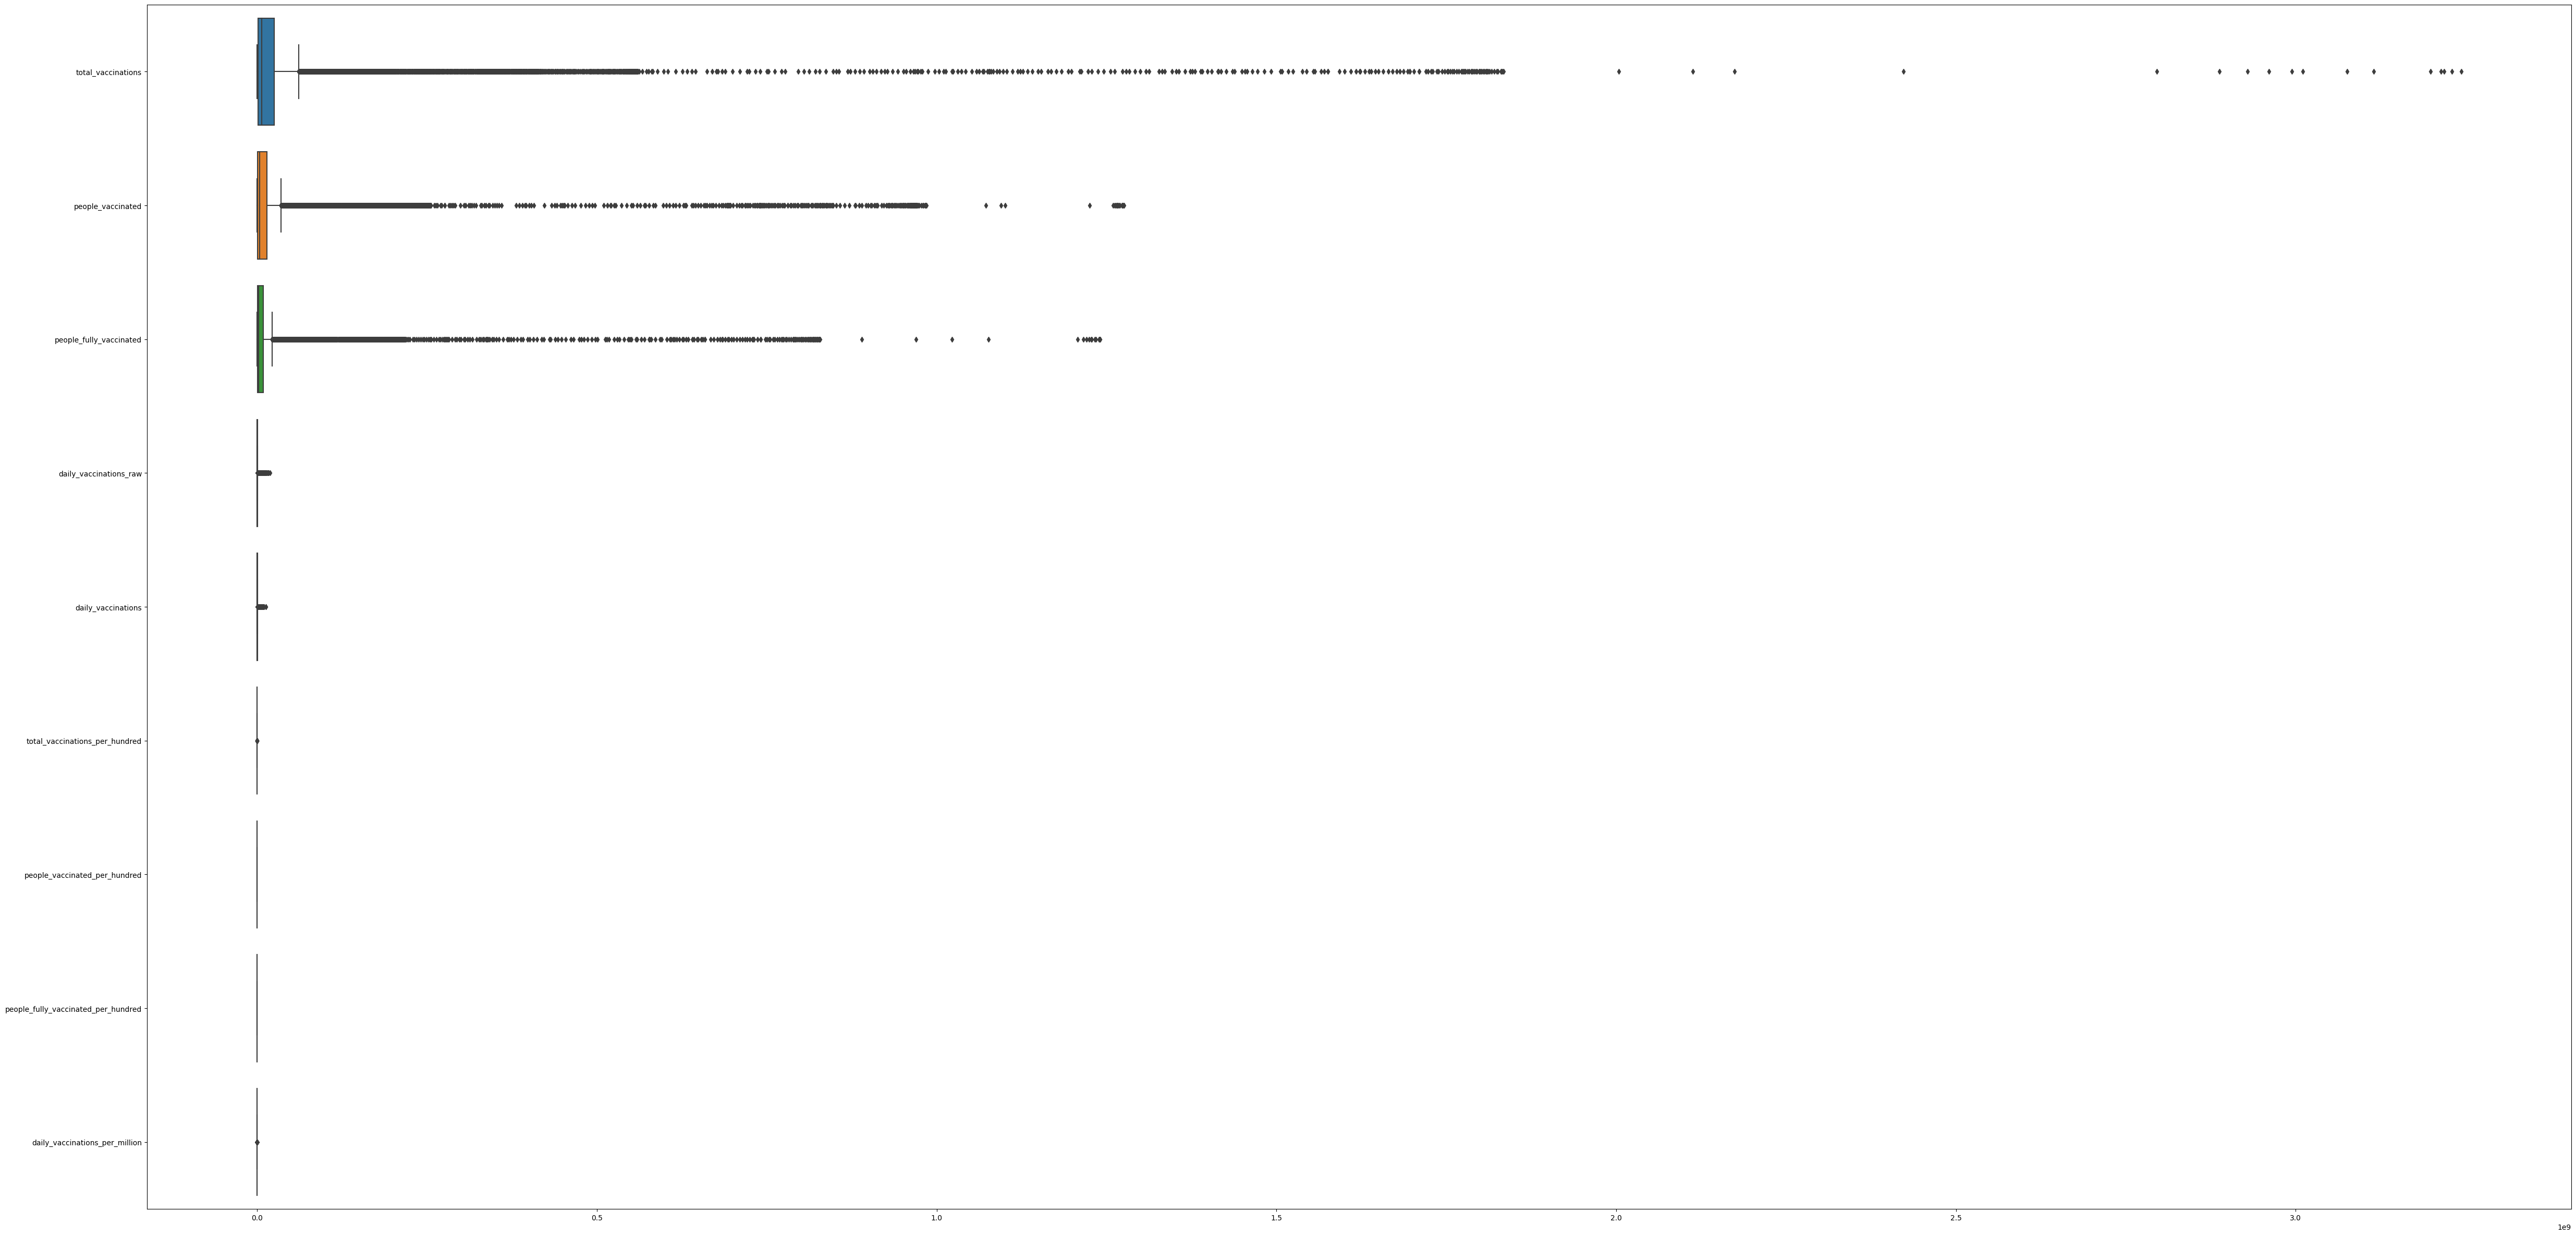

In [232]:
plt.figure(figsize=(60,30))
sns.boxplot(data,orient='h')
plt.show


In manufacture dataset

<function matplotlib.pyplot.show(close=None, block=None)>

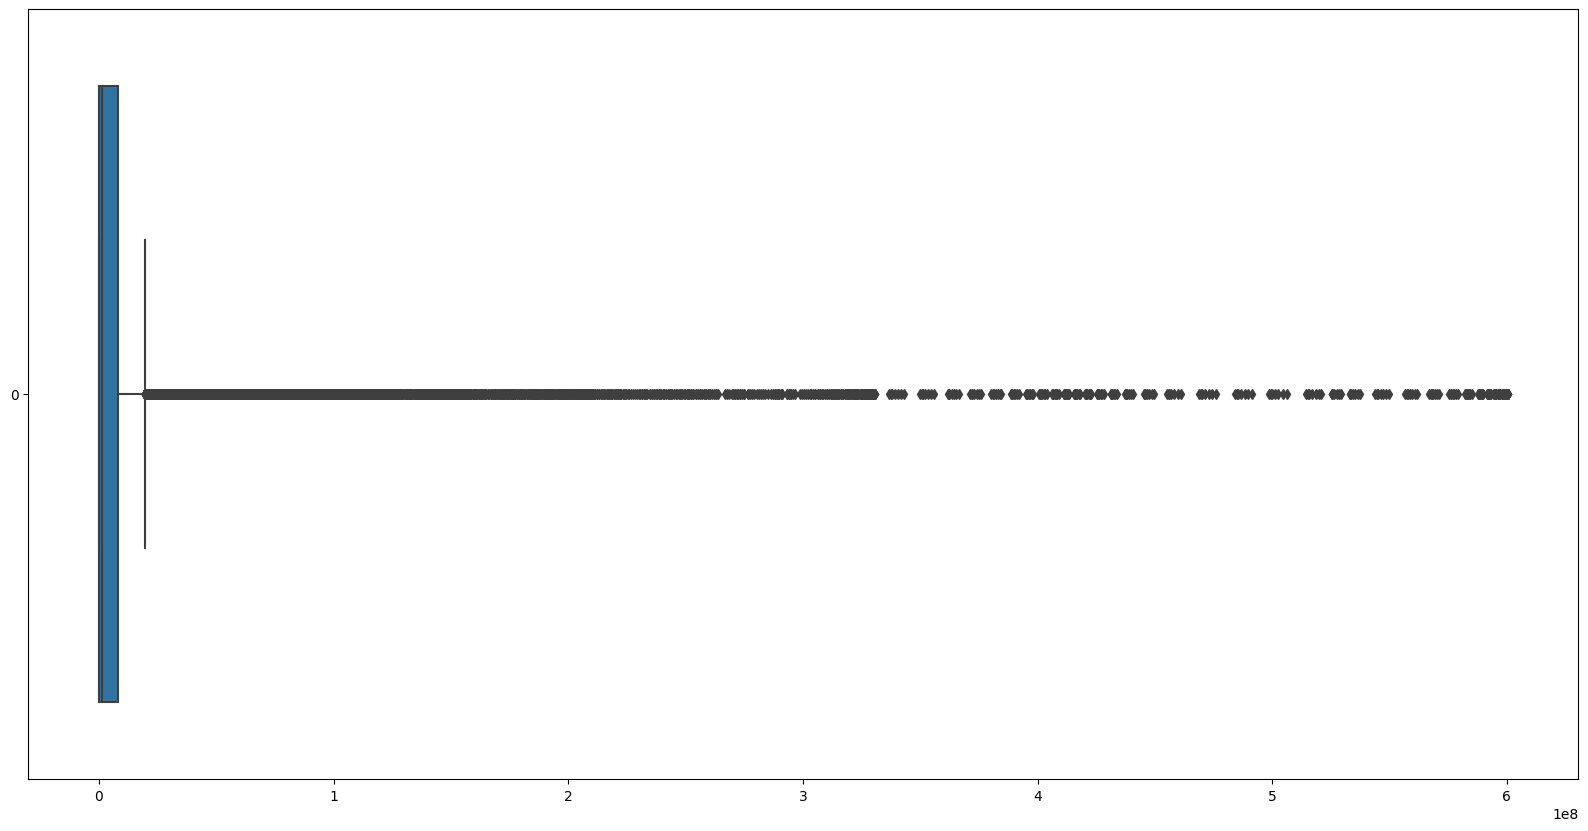

In [233]:
plt.figure(figsize=(20,10))
sns.boxplot(data_manu["total_vaccinations"],orient='h')
plt.show

In [234]:
list1=['total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','daily_vaccinations_per_million']

In [235]:
for c in list1:
  col=data[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  length=len(col[(col<lower) | (col>upper)])
  print(f"Outlier on  {c}    is {length}")
  print("                   ")



Outlier on  total_vaccinations    is 4407
                   
Outlier on  people_vaccinated    is 4384
                   
Outlier on  people_fully_vaccinated    is 4826
                   
Outlier on  daily_vaccinations_raw    is 4091
                   
Outlier on  daily_vaccinations    is 4004
                   
Outlier on  total_vaccinations_per_hundred    is 26
                   
Outlier on  daily_vaccinations_per_million    is 769
                   


In [236]:
for c in list1:
  col=data[c]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  col[col<lower]=lower
  col[col>upper]=upper
  print("completed")

completed
completed
completed
completed
completed
completed
completed


<ipython-input-236-216476291081>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col<lower]=lower
<ipython-input-236-216476291081>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col>upper]=upper
<ipython-input-236-216476291081>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col<lower]=lower
<ipython-input-236-216476291081>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [237]:
  col=data_manu["total_vaccinations"]
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  iqr=q3-q1
  lower=q1 - 1.5 *iqr
  upper=q3 + 1.5*iqr
  length=len(col[(col<lower) | (col>upper)])
  print(f"Outlier on  total_vaccinations    is {length}")
  print("                   ")


Outlier on  total_vaccinations    is 4544
                   


In [238]:
  col[col<lower]=lower
  col[col>upper]=upper

<ipython-input-238-7bc142f7dd93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col<lower]=lower
<ipython-input-238-7bc142f7dd93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col>upper]=upper


In [239]:
  length=len(col[(col<lower) | (col>upper)])
  print(f"Outlier on  total_vaccinations    is {length}")

Outlier on  total_vaccinations    is 0


After handling the outliers both dataset boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

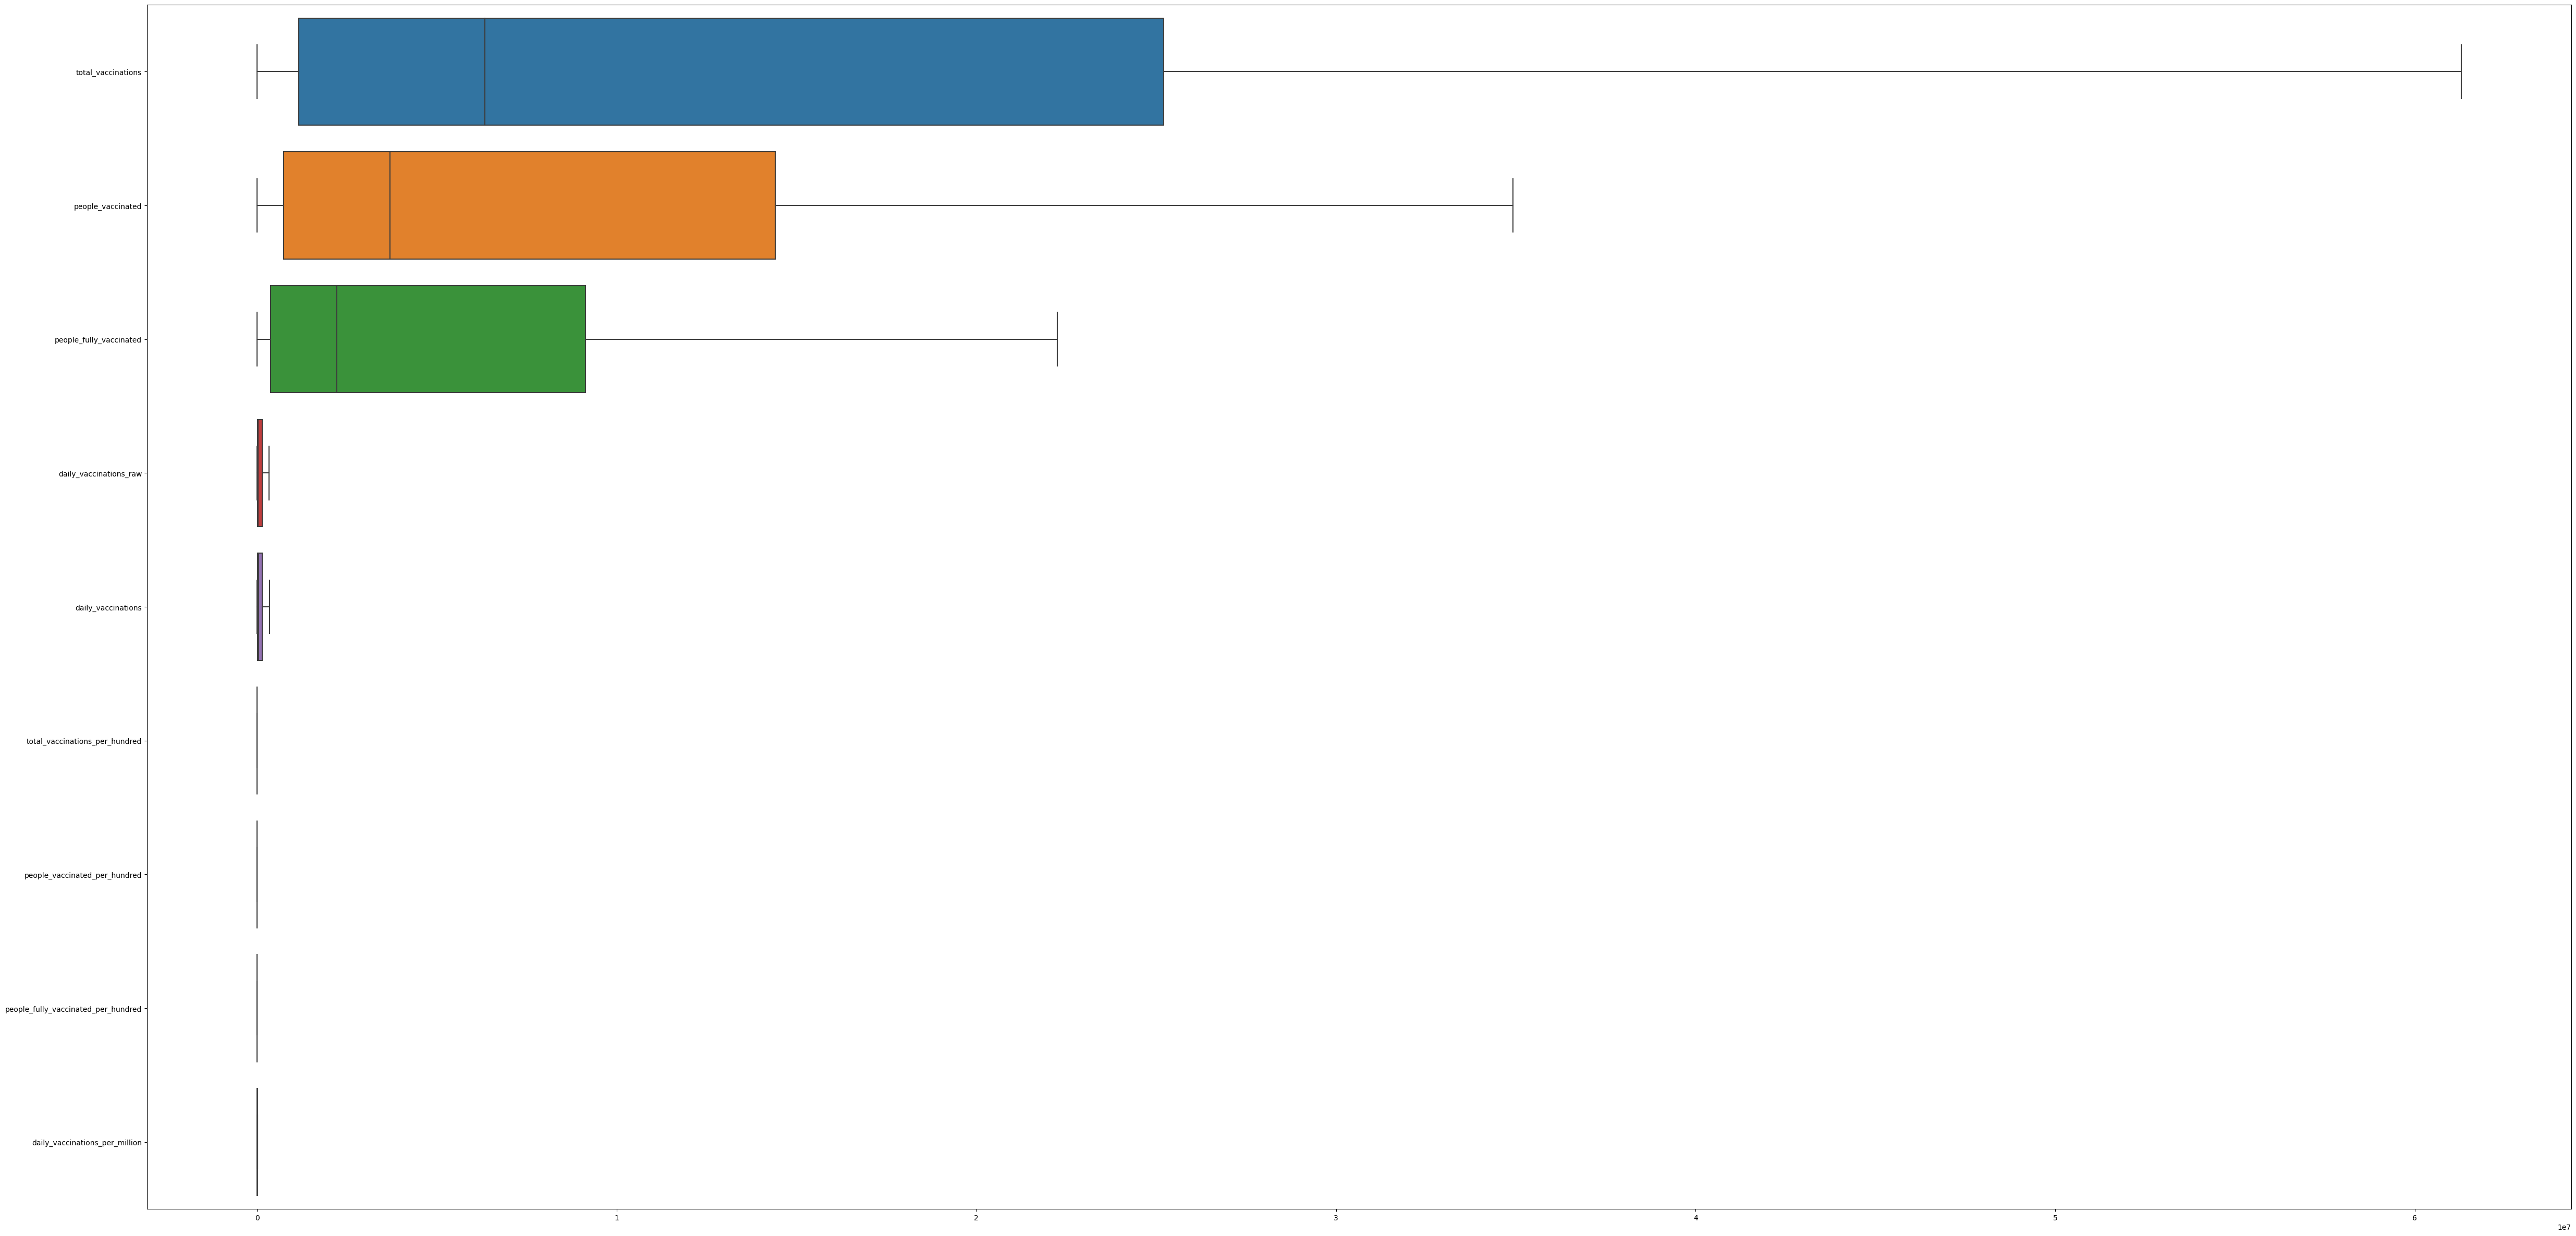

In [240]:
plt.figure(figsize=(60,30))
sns.boxplot(data,orient='h')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

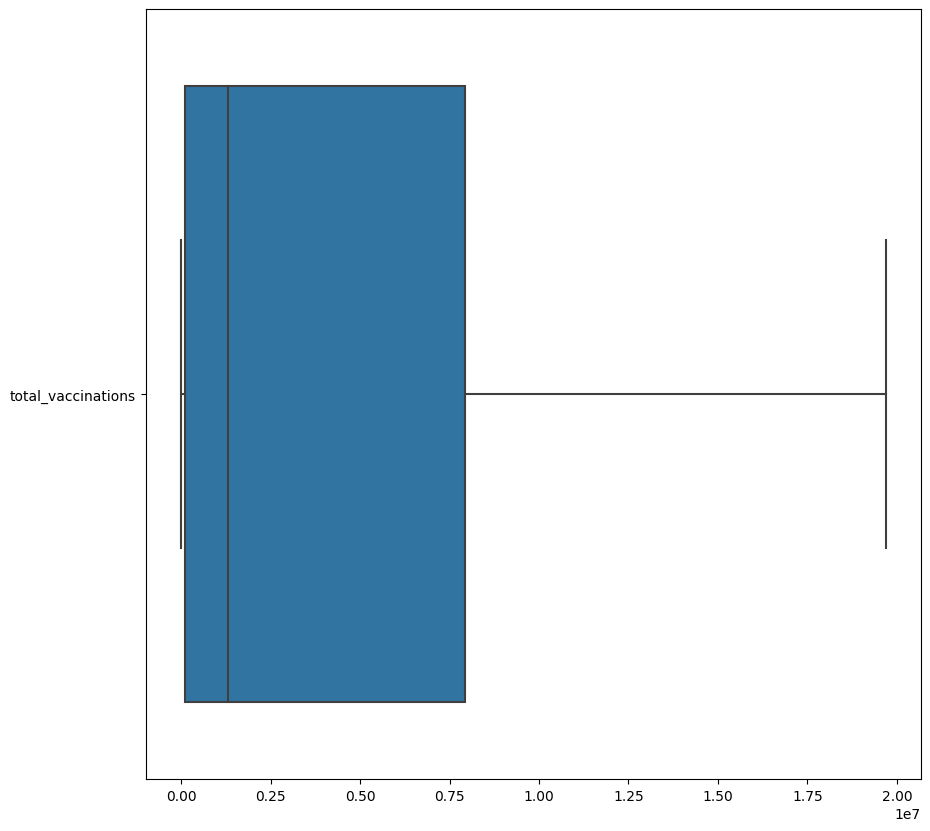

In [241]:
plt.figure(figsize=(10,10))
sns.boxplot(data_manu,orient='h')
plt.show

In [242]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.084700e+04,3.084700e+04,3.084700e+04,30847.000000,30847.000000,30847.000000,30847.000000,30847.000000,30847.000000
mean,1.705935e+07,9.587147e+06,6.369341e+06,89622.957759,93837.217071,88.595403,44.793028,36.563440,4144.458635
std,2.187500e+07,1.237931e+07,8.118668e+06,116020.390309,119257.938525,67.444199,28.464379,28.532602,3217.135674
min,3.000000e+00,3.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.153332e+06,7.339795e+05,3.704450e+05,5498.000000,7329.500000,25.475000,17.190000,7.400000,1567.500000
50%,6.335305e+06,3.688092e+06,2.211035e+06,29081.000000,32472.000000,81.470000,48.160000,34.110000,3254.000000
75%,2.520629e+07,1.440668e+07,9.121526e+06,134458.000000,140291.500000,140.745000,70.330000,63.570000,6069.500000
max,6.128573e+07,3.491573e+07,2.224815e+07,327898.000000,339734.500000,313.650000,124.760000,122.370000,12822.500000


on the manufactururas data we can only have total vaccination in the countries on day by day

In [243]:
data_manu.describe()

,total_vaccinations
count,3.562300e+04
mean,5.137679e+06
std,7.003622e+06
min,0.000000e+00
25%,9.777600e+04
50%,1.305506e+06
75%,7.932423e+06
max,1.968439e+07


Find Correlation of the column


<ipython-input-244-4236846674f2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap="Accent",annot=True,vmin=-1,vmax=1,center=0)


<Axes: >

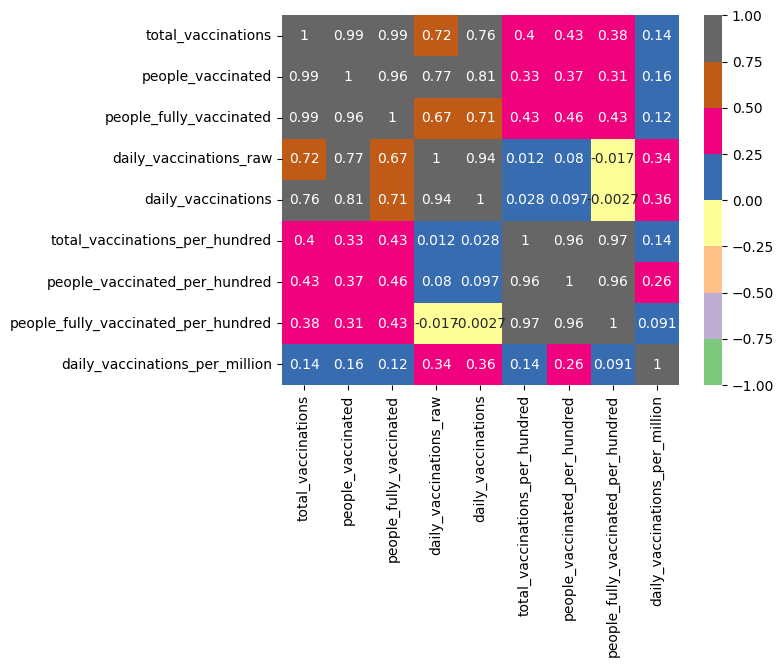

In [244]:
sns.heatmap(data.corr(),cmap="Accent",annot=True,vmin=-1,vmax=1,center=0)

Number of Countries that are present in dataset

In [245]:
len(data["country"].unique())

169

<Axes: xlabel='total_vaccinations', ylabel='Count'>

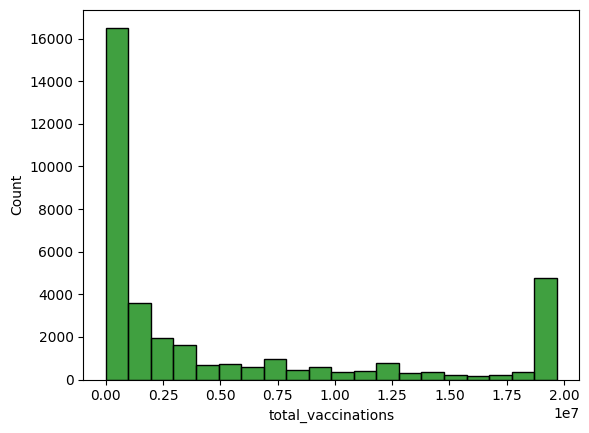

In [246]:
sns.histplot(data=data_manu["total_vaccinations"],bins=20,color= 'g')

Calculate the Total vaccination on date wise

In [247]:
total_vac=[]
for x in data_manu["location"].unique():
     z=data_manu.loc[data_manu["location"]== x]
     total=0
     total=z["total_vaccinations"].sum()


     total_vac.append(total)

In [248]:
df=pd.DataFrame({'location':data_manu["location"].unique(),'total_vaccinations':total_vac})
df.head()

,location,total_vaccinations
0,Argentina,1.711444e+10
1,Austria,5.965148e+08
2,Belgium,8.343959e+08
3,Bulgaria,1.342383e+08
4,Chile,9.170587e+09


Country wise vaccination

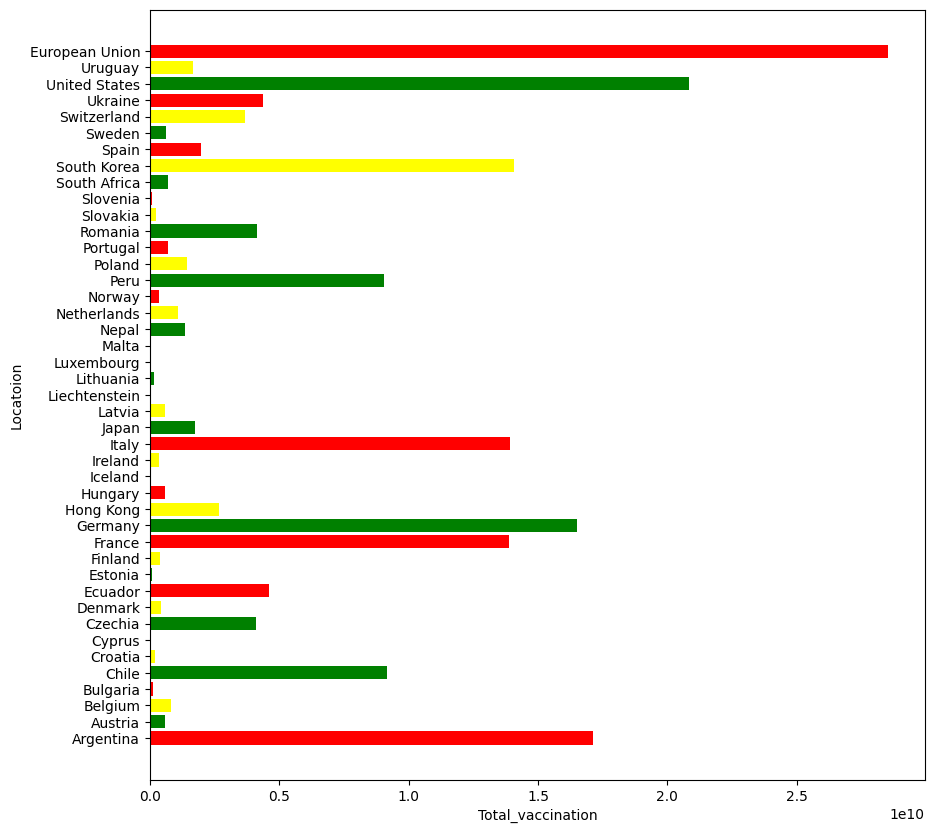

In [249]:
x=data_manu["location"].unique()
y=total_vac
plt.figure(figsize=(10,10))
plt.ylabel("Locatoion")
plt.xlabel("Total_vaccination")
plt.barh(x,y,color=["red",'green','yellow'])
plt.show()

 In Country vaccination csv

In [250]:
total_vac1=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["total_vaccinations"].sum()


     total_vac1.append(total)

Calculate  the peple_vaccinated and people_fully_vaccinated for countries

In [251]:
total_vac2=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["people_vaccinated"].sum()


     total_vac2.append(total)

In [252]:
total_vac3=[]
for x in data["country"].unique():
     z=data.loc[data["country"]== x]
     total=0
     total=z["people_fully_vaccinated"].sum()


     total_vac3.append(total)


In [253]:
data["country"].value_counts()

United States    470
Israel           465
Switzerland      462
Estonia          457
Germany          457
                ... 
Ghana              1
Ethiopia           1
Mauritius          1
Gambia             1
Sierra Leone       1
Name: country, Length: 169, dtype: int64

Create dataframe for country wise vaccination distibution

In [254]:
datafre={"country":data['country'].unique(),"total_vaccinations":total_vac1,"People_Vaccinated":total_vac2,"people_Fully_vaccinated":total_vac3}
new_data=pd.DataFrame(datafre)
new_data

,country,total_vaccinations,People_Vaccinated,people_Fully_vaccinated
0,Afghanistan,6.304682e+06,5.478754e+06,4.131076e+06
1,Albania,1.748274e+08,9.592519e+07,7.658774e+07
2,Algeria,2.432556e+07,1.357837e+07,1.070525e+07
3,Andorra,1.526900e+04,9.781000e+03,4.484000e+03
4,Antigua and Barbuda,6.160890e+05,3.551400e+05,2.609490e+05
...,...,...,...,...
164,Uzbekistan,2.648153e+08,1.442560e+08,6.025293e+07
165,Vietnam,3.551691e+09,2.521270e+09,8.917782e+08
166,Wales,1.805534e+09,8.840849e+08,6.909660e+08
167,Zambia,1.662901e+07,1.146332e+07,5.165692e+06


<ipython-input-255-06b17ff4edf7>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x1,shade=True,label="people_vaccinated",fill=None)


<Figure size 2000x2000 with 0 Axes>

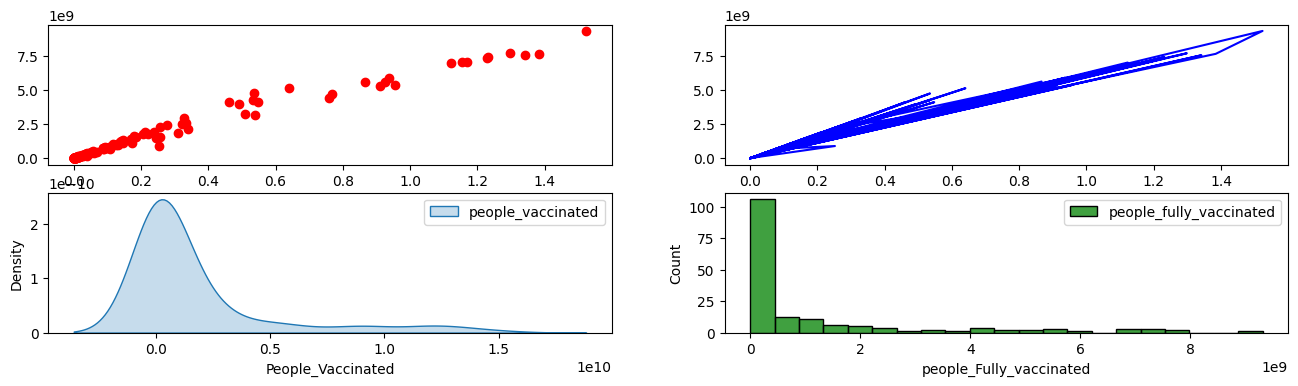

In [255]:
plt.figure(figsize=(20,20))
x1=new_data["People_Vaccinated"]
y1=new_data["people_Fully_vaccinated"]
plt.figure(figsize=(16,4))
plt.subplot(2,2,1)
plt.scatter(x1,y1,color="red")
plt.subplot(2,2,2)
plt.plot(x1,y1,color='blue')
plt.subplot(2,2,3)
sns.kdeplot(x1,shade=True,label="people_vaccinated",fill=None)
plt.legend()
plt.subplot(2,2,4)
sns.histplot(y1,color='green',label='people_fully_vaccinated')
plt.legend()
plt.show()

From above graph we can say that these two fields are  positively relatived

<ipython-input-256-a7eb3de65a8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(new_data.corr(),cmap='GnBu',annot=True))


Axes(0.125,0.11;0.62x0.77)


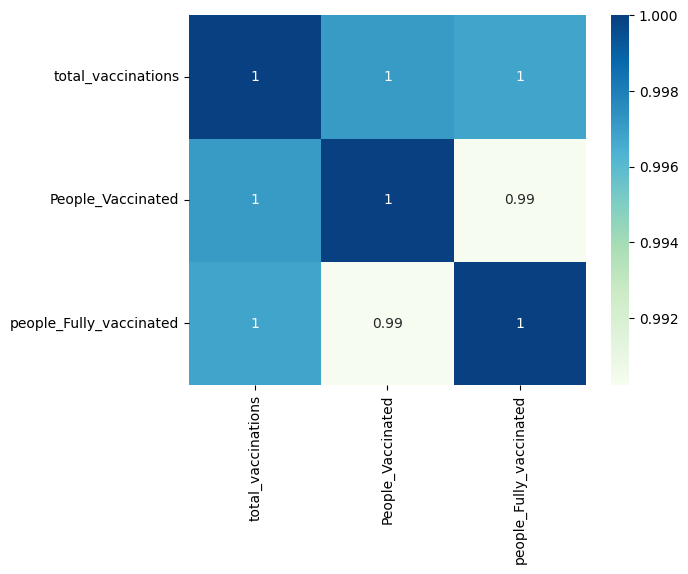

In [256]:
print(sns.heatmap(new_data.corr(),cmap='GnBu',annot=True))

In [257]:
print(data)

           country iso_code        date  total_vaccinations  \
94     Afghanistan      AFG  2021-05-27            593313.0   
101    Afghanistan      AFG  2021-06-03            630305.0   
339    Afghanistan      AFG  2022-01-27           5081064.0   
433        Albania      ALB  2021-02-18              3049.0   
515        Albania      ALB  2021-05-11            622507.0   
...            ...      ...         ...                 ...   
86507     Zimbabwe      ZWE  2022-03-25           8691642.0   
86508     Zimbabwe      ZWE  2022-03-26           8791728.0   
86509     Zimbabwe      ZWE  2022-03-27           8845039.0   
86510     Zimbabwe      ZWE  2022-03-28           8934360.0   
86511     Zimbabwe      ZWE  2022-03-29           9039729.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
94              479574.0                 113739.0                  2859.0   
101             481800.0                 148505.0                  4015.0   
339         

In [258]:
data_manu.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2.0
1,Argentina,2020-12-29,Oxford/AstraZeneca,3.0
2,Argentina,2020-12-29,Sinopharm/Beijing,1.0
3,Argentina,2020-12-29,Sputnik V,20481.0
4,Argentina,2020-12-30,Moderna,2.0
